In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd, numpy as np
import string
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# function to read a text

def open_text(filename):
    
    file = open(filename, 'rt')
    text = file.read()
    file.close()
    return text

In [4]:
# function to clean and split a text 

def clean_text(filename,write_file):
    text=open_text(filename)
    text=re.sub("RT @[A-Za-z0-9_]+","",text) 
    text = re.sub(r"http\S+", "", text)
    text=text.encode("ascii", "ignore")
    text=text.decode()
    text = text.split("/r/n")
    table = str.maketrans('', '', string.punctuation)
    text = [w.translate(table) for w in text]
    with open(write_file, "w") as f:
        for line in text: f.write(line)
    return text

In [5]:
#clean the negative tweets text:

clean_positive_tweets=clean_text("positive_tweets.txt","clean_positive_tweets.txt")

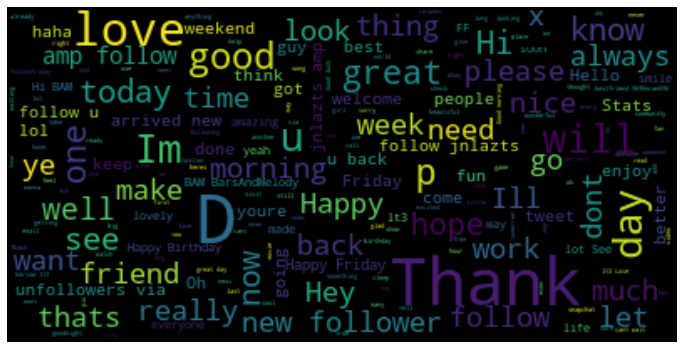

In [96]:
# Create and generate a word cloud image for positive tweets:
text=open_text("clean_positive_tweets.txt")
wordcloud = WordCloud(max_font_size=40).generate(text)

# Display the generated image:
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import Pipeline

text=[open_text("clean_positive_tweets.txt")]

pipeline = Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('norm',Normalizer(norm='l2')),])
pipeline.fit(text);

In [7]:
pipeline.steps[0][1].vocabulary_

{'followfriday': 13579,
 'franceinte': 14072,
 'pkuchly57': 31453,
 'milipolparis': 25984,
 'for': 13670,
 'being': 5148,
 'top': 41797,
 'engaged': 11744,
 'members': 25703,
 'in': 19130,
 'my': 27079,
 'community': 8462,
 'this': 40324,
 'week': 44327,
 'lamb2ja': 22652,
 'hey': 17578,
 'james': 20733,
 'how': 18294,
 'odd': 28938,
 'please': 31586,
 'call': 6939,
 'our': 30175,
 'contact': 8668,
 'centre': 7486,
 'on': 29508,
 '02392441234': 21,
 'and': 2371,
 'we': 44163,
 'will': 45129,
 'be': 4678,
 'able': 748,
 'to': 40952,
 'assist': 3678,
 'you': 46676,
 'many': 24925,
 'thanks': 38617,
 'despiteofficial': 10142,
 'had': 16342,
 'listen': 23539,
 'last': 22717,
 'night': 28190,
 'as': 3496,
 'bleed': 5817,
 'is': 19822,
 'an': 2287,
 'amazing': 2056,
 'track': 41900,
 'when': 44852,
 'are': 3238,
 'scotland': 34458,
 '97sides': 657,
 'congrats': 8577,
 'yeaaaah': 46361,
 'yippppy': 46617,
 'accnt': 887,
 'verified': 43269,
 'rqst': 33855,
 'has': 16773,
 'succeed': 37417,
 'g

In [8]:
df_positive_tweets = pd.read_csv("clean_positive_tweets.txt",names= ['text']) 
df_positive_tweets

,text
0,FollowFriday FranceInte PKuchly57 MilipolParis...
1,Lamb2ja Hey James How odd Please call our Con...
2,DespiteOfficial we had a listen last night As...
3,97sides CONGRATS
4,yeaaaah yippppy my accnt verified rqst has su...
...,...
5662,chriswiggin3 Chris thats great to hear Due ti...
5663,RachelLiskeard Thanks for the shoutout Its gr...
5664,side556 Hey Long time no talk
5665,staybubbly69 as Matt would say WELCOME TO ADUL...


In [9]:
import numpy as np
tf_idf = pipeline.transform(df_positive_tweets['text'])
vocab = np.array(pipeline.named_steps['vect'].get_feature_names())
normalized_tf_idf = dict([(vocab[i],tf_idf[0,i]) for i in range(tf_idf.shape[1]) if tf_idf[0,i]>0])

In [10]:
normalized_tf_idf

{'being': 0.19245008972987526,
 'being top': 0.19245008972987526,
 'community': 0.19245008972987526,
 'community this': 0.19245008972987526,
 'engaged': 0.19245008972987526,
 'engaged members': 0.19245008972987526,
 'followfriday': 0.19245008972987526,
 'followfriday franceinte': 0.19245008972987526,
 'for': 0.19245008972987526,
 'for being': 0.19245008972987526,
 'franceinte': 0.19245008972987526,
 'franceinte pkuchly57': 0.19245008972987526,
 'in': 0.19245008972987526,
 'in my': 0.19245008972987526,
 'members': 0.19245008972987526,
 'members in': 0.19245008972987526,
 'milipolparis': 0.19245008972987526,
 'milipolparis for': 0.19245008972987526,
 'my': 0.19245008972987526,
 'my community': 0.19245008972987526,
 'pkuchly57': 0.19245008972987526,
 'pkuchly57 milipolparis': 0.19245008972987526,
 'this': 0.19245008972987526,
 'this week': 0.19245008972987526,
 'top': 0.19245008972987526,
 'top engaged': 0.19245008972987526,
 'week': 0.19245008972987526}

In [27]:
#Print terms with highest weights
sorted_normalized_tf_idf = sorted(normalized_tf_idf.items(), key=lambda x: -x[1]) # sort dictionary by value. returns list
sorted_normalized_tf_idf[:20]

[('being', 0.19245008972987526),
 ('being top', 0.19245008972987526),
 ('community', 0.19245008972987526),
 ('community this', 0.19245008972987526),
 ('engaged', 0.19245008972987526),
 ('engaged members', 0.19245008972987526),
 ('followfriday', 0.19245008972987526),
 ('followfriday franceinte', 0.19245008972987526),
 ('for', 0.19245008972987526),
 ('for being', 0.19245008972987526),
 ('franceinte', 0.19245008972987526),
 ('franceinte pkuchly57', 0.19245008972987526),
 ('in', 0.19245008972987526),
 ('in my', 0.19245008972987526),
 ('members', 0.19245008972987526),
 ('members in', 0.19245008972987526),
 ('milipolparis', 0.19245008972987526),
 ('milipolparis for', 0.19245008972987526),
 ('my', 0.19245008972987526),
 ('my community', 0.19245008972987526)]

In [12]:
# clean the begative tweets text:

clean_negative_tweets=clean_text("negative_tweets.txt","clean_negative_tweets.txt")

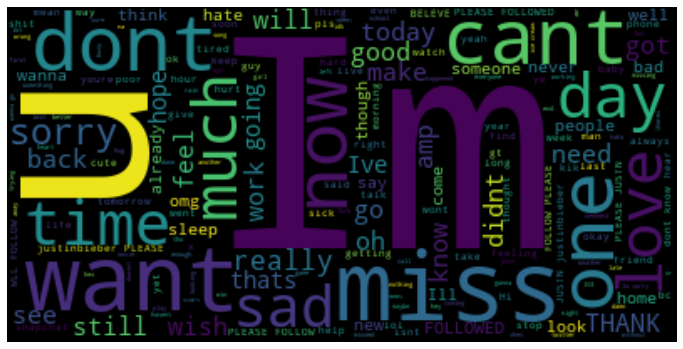

In [97]:
# Create and generate a word cloud image for negative tweets:
text=open_text("clean_negative_tweets.txt")
wordcloud = WordCloud().generate(text)

# Display the generated image:
fig = plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [15]:
text_2=[open_text("clean_negative_tweets.txt")]

pipeline_2 = Pipeline([('vect',CountVectorizer(ngram_range=(1,2))),('norm',Normalizer(norm='l2')),])
pipeline_2.fit(text_2);

In [16]:
pipeline_2.steps[0][1].vocabulary_

{'hopeless': 16366,
 'for': 12389,
 'tmr': 38309,
 'everything': 11223,
 'in': 17441,
 'the': 36433,
 'kids': 20037,
 'section': 32086,
 'of': 26777,
 'ikea': 17106,
 'is': 18048,
 'so': 33602,
 'cute': 8479,
 'shame': 32521,
 'im': 17179,
 'nearly': 25408,
 '19': 147,
 'months': 24137,
 'hegelbon': 15648,
 'that': 36188,
 'heart': 15587,
 'sliding': 33386,
 'into': 17945,
 'waste': 41257,
 'basket': 4103,
 'ketchburning': 19949,
 'hate': 15118,
 'japanese': 19038,
 'call': 6354,
 'him': 16018,
 'bani': 4036,
 'me': 22916,
 'too': 38959,
 'dang': 8685,
 'starting': 34665,
 'next': 25695,
 'week': 41546,
 'have': 15176,
 'work': 42748,
 'oh': 27075,
 'god': 13819,
 'my': 24681,
 'babies': 3664,
 'faces': 11471,
 'rileymcdonough': 30933,
 'make': 22419,
 'smile': 33469,
 'f0ggstar': 11434,
 'stuartthull': 35075,
 'neighbour': 25496,
 'on': 27367,
 'motors': 24321,
 'asked': 3109,
 'why': 42173,
 'and': 1952,
 'he': 15430,
 'said': 31508,
 'hates': 15160,
 'updates': 40203,
 'search': 320

In [17]:
df_negative_tweets = pd.read_csv("clean_negative_tweets.txt",names= ['text']) 
df_negative_tweets

,text
0,hopeless for tmr
1,Everything in the kids section of IKEA is so c...
2,Hegelbon That heart sliding into the waste bas...
3,ketchBurning I hate Japanese call him bani
4,Me too
...,...
5336,I wanna change my avi but uSanele
5337,MY PUPPY BROKE HER FOOT
5338,wheres all the jaebum baby pictures
5339,But but Mr Ahmad Maslan cooks too


In [22]:
tf_idf_2 = pipeline_2.transform(df_negative_tweets['text'])
vocab_2 = np.array(pipeline_2.named_steps['vect'].get_feature_names())
normalized_tf_idf_2 = dict([(vocab_2[i],tf_idf_2[0,i]) for i in range(tf_idf_2.shape[1]) if tf_idf_2[0,i]>0])

In [23]:
normalized_tf_idf_2

{'for': 0.4472135954999579,
 'for tmr': 0.4472135954999579,
 'hopeless': 0.4472135954999579,
 'hopeless for': 0.4472135954999579,
 'tmr': 0.4472135954999579}

In [29]:
#Print terms with highest weights
sorted_normalized_tf_idf_2= sorted(normalized_tf_idf_2.items(), key=lambda x: -x[1]) # sort dictionary by value. returns list
sorted_normalized_tf_idf_2[:20]

[('for', 0.4472135954999579),
 ('for tmr', 0.4472135954999579),
 ('hopeless', 0.4472135954999579),
 ('hopeless for', 0.4472135954999579),
 ('tmr', 0.4472135954999579)]